In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTANT: Ensure the file path is correct for your local machine
file_path = '/Users/HP/Documents/project-team-4/ai_job_market.csv'
df = pd.read_csv(file_path)

# PRE-PROCESSING (Need this to create 'avg_salary' for the model)
df[['min_salary', 'max_salary']] = df['salary_range_usd'].str.split('-', expand=True).astype(float)
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2


model_anova = ols('avg_salary ~ C(experience_level)', data=df).fit()

# 2. Perform ANOVA
anova_table = sm.stats.anova_lm(model_anova, typ=2)

print("--- ANOVA Results ---")
print(anova_table)

# Interpretation
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print(f"\nResult: Significant (p={p_value:.4f}). Experience level affects salary.")
else:
    print(f"\nResult: Not Significant (p={p_value:.4f}). Experience level does not significantly affect salary.")

--- ANOVA Results ---
                           sum_sq      df         F   PR(>F)
C(experience_level)  2.847058e+09     2.0  1.177278  0.30833
Residual             2.414712e+12  1997.0       NaN      NaN

Result: Not Significant (p=0.3083). Experience level does not significantly affect salary.


/var/folders/0z/t_l1f7_n1074l0p0g2mr8q480000gn/T/ipykernel_30822/2863207596.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# 1. Select the features we want to use for prediction
features = ['experience_level', 'industry', 'company_size', 'employment_type']
X = df[features]
y = df['avg_salary']

# 2. Convert text categories into numerical 'dummy' variables
# We use drop_first=True to avoid the "dummy variable trap" (multicollinearity)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Split the data: 80% for training the model, 20% for testing its accuracy
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Data successfully prepared for modeling.")
print(f"Number of features after encoding: {X_encoded.shape[1]}")

Data successfully prepared for modeling.
Number of features after encoding: 13


--- Model Evaluation ---
Mean Absolute Error (MAE): $30906.57
R-squared Score: -0.0235


/Users/HP/Documents/project-team-4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/HP/Documents/project-team-4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/HP/Documents/project-team-4/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


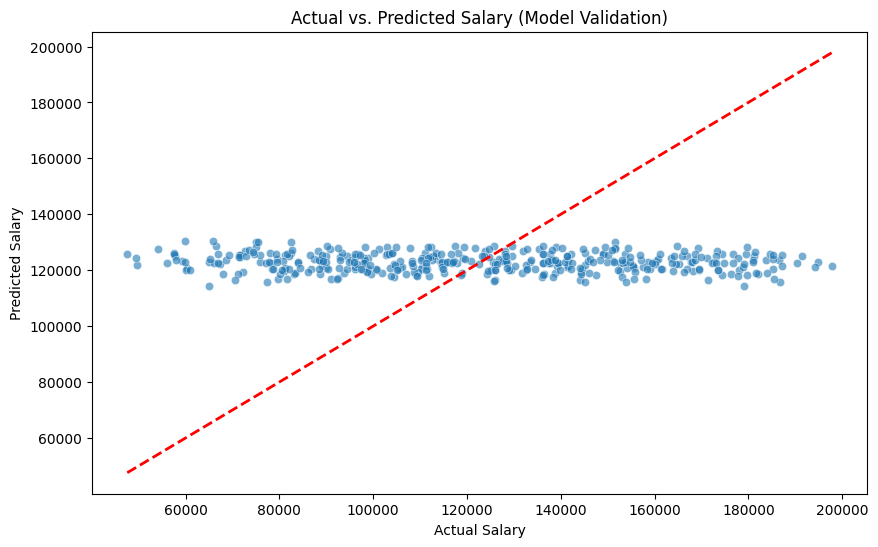

In [4]:
# 1. Initialize and Train the Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2. Make Predictions on the Test Set
y_pred = regressor.predict(X_test)

# 3. Calculate Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary (Model Validation)")
plt.show()

In [5]:
# 1. Save the trained model
joblib.dump(regressor, 'salary_model.pkl')

# 2. Save the column names of X_encoded 
# This ensures the user's input in Streamlit matches the format the model expects
model_columns = list(X_encoded.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("Success! 'salary_model.pkl' and 'model_columns.pkl' have been saved.")
print("You are now ready to build the Streamlit app.")

Success! 'salary_model.pkl' and 'model_columns.pkl' have been saved.
You are now ready to build the Streamlit app.
